# Data preparation

Author: Wenxin Yang

Date: October 6

### Purpose of script
We try different methods in the scikit-eo package to predict urban parks.

### Steps

1. 

In [ ]:
from scikeo.deeplearning import DL

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [1]:
import os
import rasterio
import numpy as np
from scikeo.mla import MLA
# from scikeo.deeplearning import DL
from scikeo.process import extract
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import geopandas as gpd
from scikeo.plot import plotRGB
from scikeo.writeRaster import writeRaster

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
os.getcwd()

'/Users/wenxinyang/Desktop/GitHub/UGS_iguide2024/script'

In [3]:
img = rasterio.open('../data/S2/merged.tif')
endm = gpd.read_file('../data/samp_pts/samp_pts.shp')[['value', 'geometry']]

In [4]:
img.crs == endm.crs

True

In [5]:
np.max(img.read(1))

14792.0

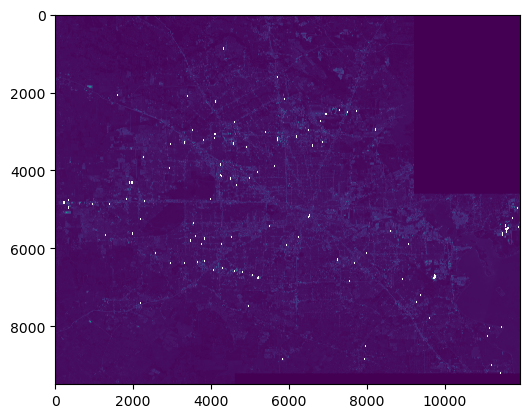

In [6]:
plt.imshow(img.read(1))

In [6]:
endm.head()

,value,geometry
0,0,POINT (-95.87890 30.22323)
1,0,POINT (-95.39796 30.22164)
2,0,POINT (-95.32836 30.22124)
3,0,POINT (-95.18418 30.22026)
4,0,POINT (-95.27032 30.22060)


In [7]:
endm = endm.rename({'value':'class'}, axis=1)

In [8]:
# endmembers
endm1 = extract(img, endm)
endm1 = endm1.loc[endm1['band1']!=0, ]
endm1.head()

,class,band1,band2,band3,band4,band5,band6,band7,band8,band9
20,1,784.333313,1097.25,1172.0,3285.5,3431.5,2297.000000,0.474145,-0.499287,0.177071
26,1,853.000000,1060.00,1079.0,2361.5,2533.0,1741.500000,0.372766,-0.380389,0.151109
30,0,436.500000,788.00,466.0,2504.0,1637.0,899.666687,0.686195,-0.521264,0.471354
32,0,354.000000,494.00,413.0,1834.0,1568.0,803.000000,0.632399,-0.575601,0.390975
33,0,1494.000000,2134.00,2884.0,3791.0,4496.0,3757.000000,0.135880,-0.279662,0.004505


In [19]:
inst = MLA(image = img, endmembers = endm1)

In [20]:
rf_class = inst.RF(training_split = 0.8)

Results

In [21]:
rf_class.keys()

dict_keys(['Overall_Accuracy', 'Kappa_Index', 'Confusion_Matrix', 'Classification_Map', 'Image'])

In [24]:
rf_class.get('Overall_Accuracy')

0.6574525745257452

In [22]:
rf_class.get('Kappa_Index')

0.3064363590942346

In [23]:
matrix = rf_class.get('Confusion_Matrix')
matrix

,0,1,Total,Users_Accuracy,Commission
0,502.000000,293.000000,795.0,63.144654,36.855346
1,339.000000,711.000000,1050.0,67.714286,32.285714
Total,841.000000,1004.000000,NaN,NaN,NaN
Producer_Accuracy,59.690844,70.816733,NaN,NaN,NaN
Omission,40.309156,29.183267,NaN,NaN,NaN
